In [18]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [6]:
df_price = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

In [17]:
fork_blocks = [200000, 1150000, 1920000, 2675000, 4370000, 4730666, 4936270, 5078585, 7280000]
fork_times = [ datetime(2015,9,8), datetime(2016,3,15), datetime(2016,7,20), datetime(2016,11,23), datetime(2017,10,16),
               datetime(2017,12,14), datetime(2018,1,19), datetime(2018,2,13), datetime(2019,2,28)]
fork_names = ['Ice Age', 'Homestead', 'Ethereum Classic', 'Spurious Dragon', 'Byzantium', 'EtherGold+EtherModification+Ether Fog',
              'Ether Zero', 'Ether Inc', 'Constantinople']

In [16]:
df_price.loc['2015-08-31']

Open         1.321380e+00
High         1.396150e+00
Low          1.201010e+00
Close        1.358240e+00
Adj Close    1.358240e+00
Volume       1.447180e+06
Name: 2015-08-31 00:00:00, dtype: float64

In [23]:
df_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-31,1.32138,1.39615,1.20101,1.35824,1.35824,1447180
2015-09-01,1.35348,1.39274,1.33663,1.35161,1.35161,778862
2015-09-02,1.35157,1.35491,1.26462,1.29479,1.29479,883769
2015-09-03,1.29519,1.30999,1.21103,1.26493,1.26493,702991
2015-09-04,1.26493,1.30252,1.23681,1.27441,1.27441,474391
2015-09-05,1.28056,1.34230,1.27119,1.33881,1.33881,448453
2015-09-06,1.33801,1.37364,1.29425,1.29583,1.29583,491968
2015-09-07,1.29590,1.30548,1.23785,1.24665,1.24665,489014
2015-09-08,1.24665,1.28238,1.23061,1.24243,1.24243,427892


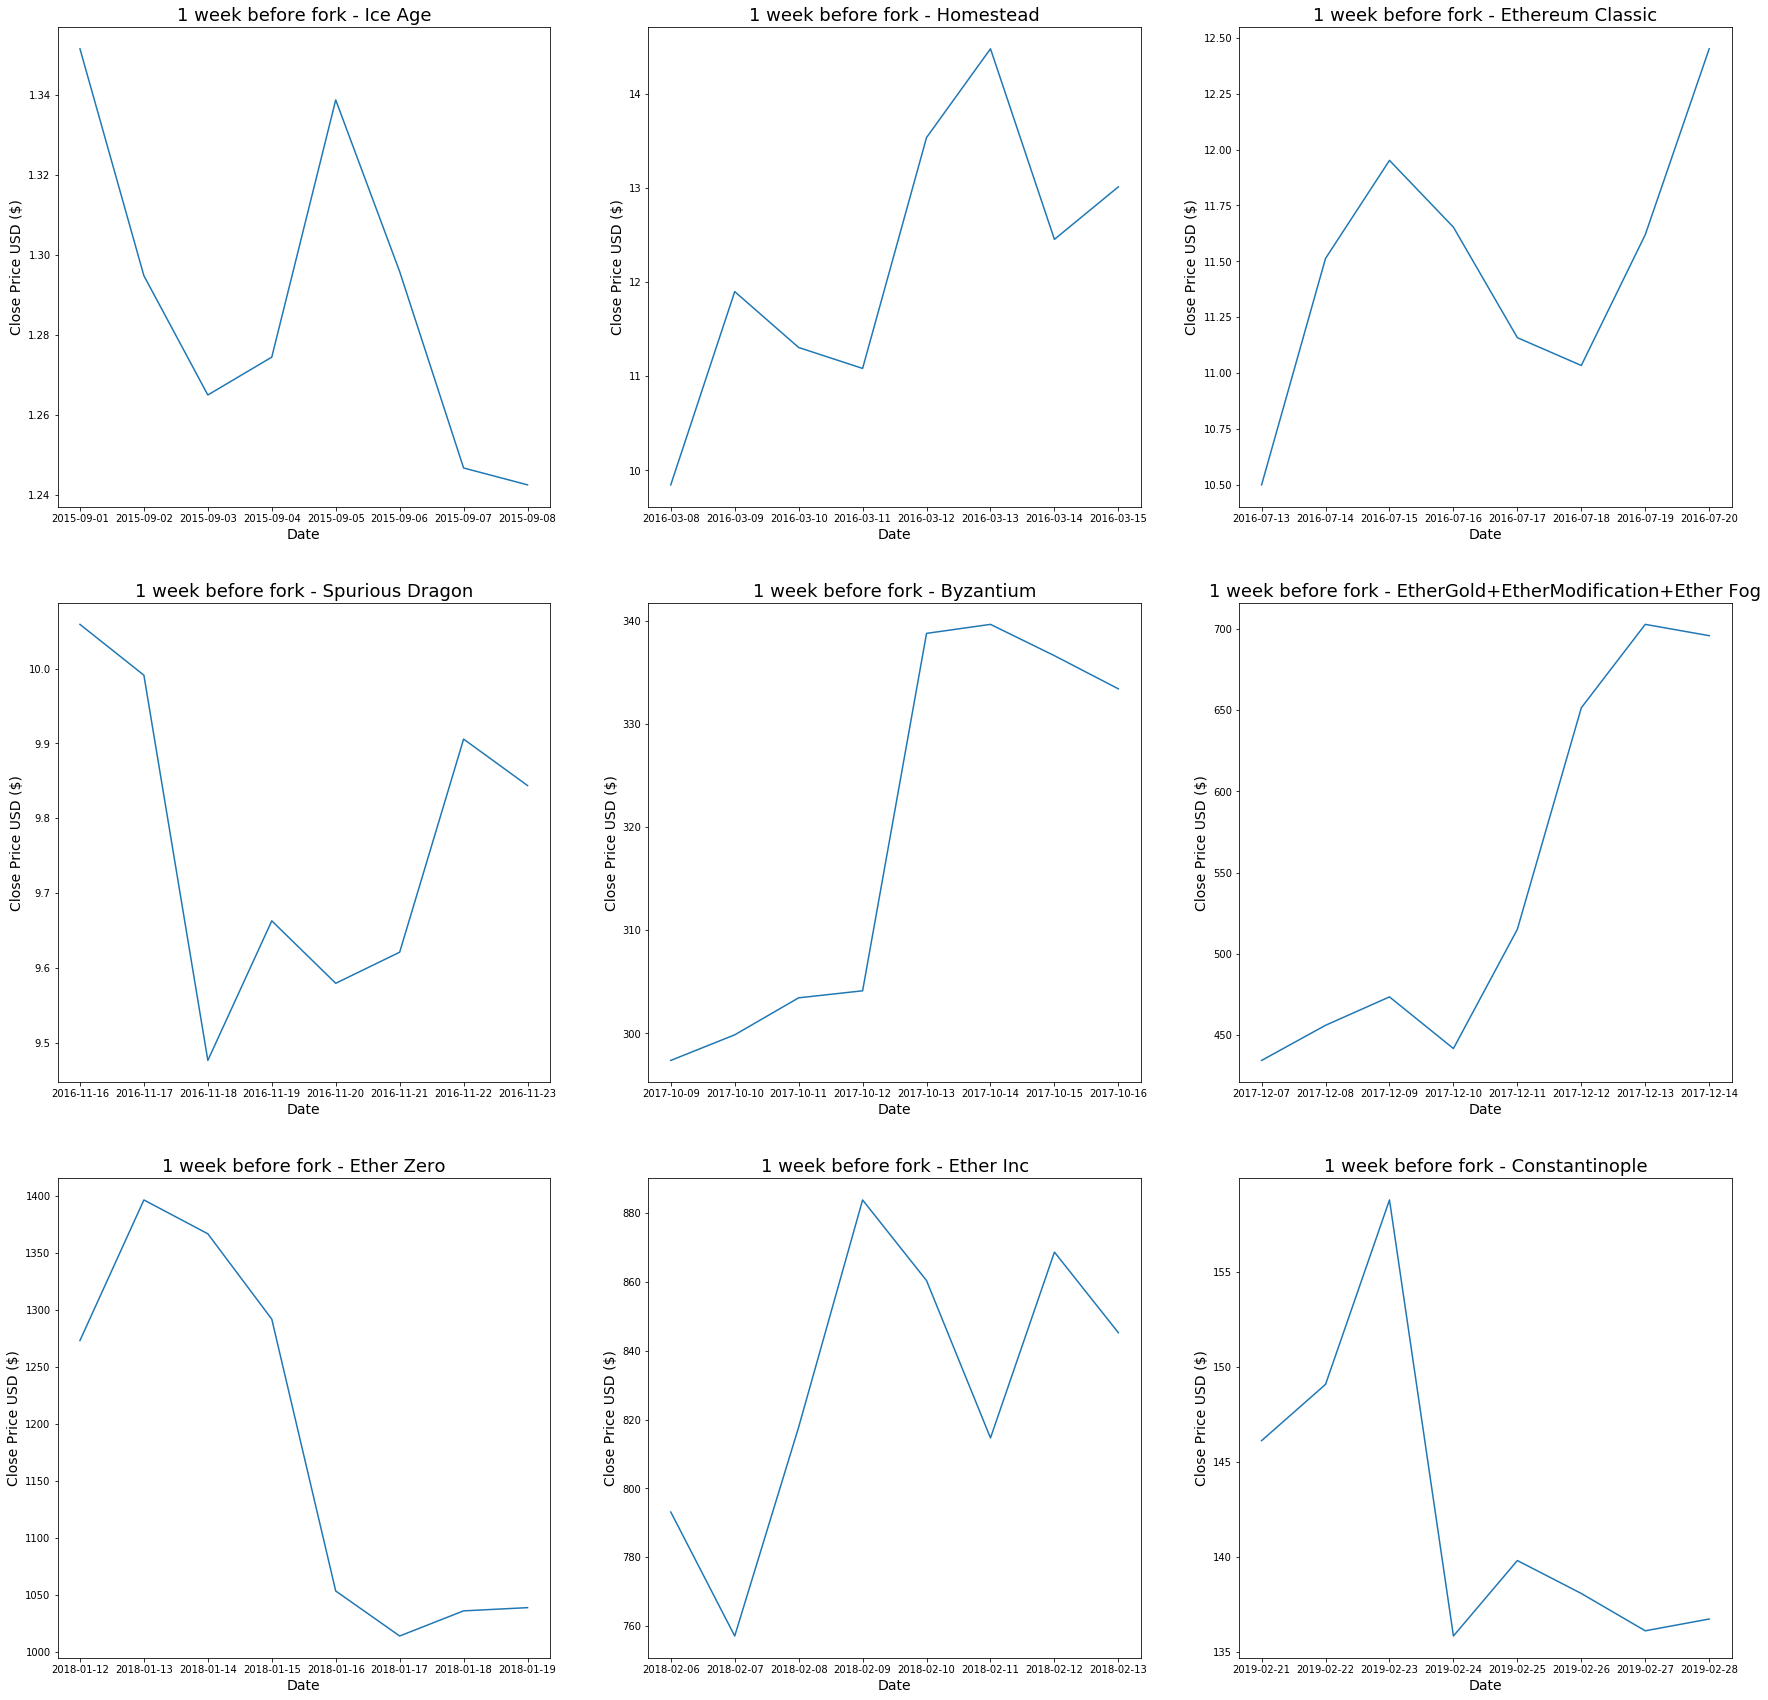

In [39]:
delta_7days = timedelta(days = -7)

fig, ax = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(30)
fig.set_figwidth(30)

for i in range(0,len(fork_names)):
    last_week = fork_times[i] + delta_7days
    start_day = last_week.strftime('%Y-%m-%d')
    end_day = fork_times[i].strftime('%Y-%m-%d')

    plot = sb.lineplot(data=df_price[(df_price.index >= start_day) & (df_price.index <= end_day)], x='Date', y='Close', ax=ax[min(int(i/3),2)][i%3])
    plot.set_title('1 week before fork - {}'.format(fork_names[i]),fontsize=18)
    plot.set_xlabel('Date',fontsize=14)
    plot.set_ylabel('Close Price USD ($)',fontsize=14)

plt.show()


In [44]:
df_price['Close_LastWeek'] = df_price['Close'].shift(periods=7)

In [57]:
df_price['Change_OneWeek'] = (df_price['Close'] - df_price['Close_LastWeek'])

In [59]:
fork_times_str = [ x.strftime('%Y-%m-%d') for x in fork_times ]

In [72]:
results = { 'name': [], 'one_week_change': [] }

for i in range(0, len(fork_times_str)):
    results['name'].append(fork_names[i])
    results['one_week_change'].append(df_price.loc[fork_times_str[i]]['Change_OneWeek'])

In [74]:
df = pd.DataFrame(results)
print(df)

                                    name  one_week_change
0                                Ice Age        -0.109180
1                              Homestead         3.162790
2                       Ethereum Classic         1.950100
3                        Spurious Dragon        -0.215480
4                              Byzantium        35.992005
5  EtherGold+EtherModification+Ether Fog       261.407989
6                             Ether Zero      -234.099975
7                              Ether Inc        52.135987
8                         Constantinople        -9.384598
